## **Project Details**
**Title:** CYO Project

**Due Date:** 13 May 2024

**Contributors:**
- Dineo Mogale (576500) 
- Ewan Morris (577388)
- Marcus Mahlatjie (577296)
- Tiaan Kritzinger (577643)
- Quinton Crouse (577696)
- Zoë Treutens (577989)

**GitHub Link:** https://github.com/Zoe21354/MLG382_GroupF_CYOProject.git

===================================================================================

# **Creditworthiness Assessment and Risk Analysis for Loan Default Prediction**
This project is a comprehensive study aimed at **building a predictive model to assess the creditworthiness of individuals or businesses**. The purpose of this project is to predict the risk of default on loans or credit lines, which is a critical aspect of financial risk assessment.

The project utilizes a dataset titled “Credit Risk Assessment” authored by Urvish Vekariya and sourced from Kaggle. The dataset will undergo a series of data analysis and preprocessing steps, including dataset analysis, univariate and bi-variate analysis, handling missing values, removing duplicates, and outlier value handling. Two models will be built and their predictions will be evaluated. The feature importance from each model will be analyzed and the models will be saved as pickle files for future use. The second model will undergo additional cross-validation to ensure its robustness.

Finally, the validated model will be deployed as a server in a web application using DASH, providing a practical interface for credit risk assessment. This project is a significant step towards leveraging machine learning for effective and efficient credit risk management. It aims to provide a reliable tool for financial institutions to make informed decisions regarding loan approvals and credit line extensions.



This notebook will take the following structure:

    1. Prepare Data (Data Analysis)
        A. Dataset Analysis
        B. Univariate Analysis
        C. Bi-variate Analysis
    2. Hypotheses
    3. Preprocess Data (Data Cleaning)
        A. Handling missing values
        B. Removing duplicates
        C. Outlier value Handling
    5. Model 1
        A. Split the Data
        B. Build the Model
    6. Feature Engineering
    7. Model 2
        A. Split the Data
        B. Build the Model
    8. Validate Model 2
    9. Web Application

===================================================================================

Before any coding can take place, certain libraries in python need to be imported to perform different functions and make various features available for use.


In [53]:
# Import Libraries
# Import Libraries
import csv                                                              # Handles CSV file operations
import pandas as pd                                                     # Data manipulation and analysis
import numpy as np                                                      # Performs mathematical operations
import matplotlib.pyplot as plt                                         # Creates static, animated, and interactive visualizations
import seaborn as sns                                                   # Creates attractive and informative statistical graphics
from sklearn.model_selection import train_test_split, GridSearchCV      # Splits data into random train and test subsets
import pickle                                                           # Serializes and de-serializes Python object structures
from sklearn.model_selection import cross_val_predict                   # Provides train/test indices to split data in train/test sets
from sklearn.linear_model import LogisticRegression                     # Implements logistic regression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score             # Computes subset accuracy classification score
from sklearn import tree                                                # Contains classes for different decision tree algorithms
from sklearn.ensemble import RandomForestClassifier
import dash
from dash import html, dcc
import plotly.graph_objs as go
from dash.dependencies import Input, Output, State
import warnings                                                         # Handles warnings during runtime
warnings.filterwarnings('ignore')                                       # Ignores displaying warnings

# **1. Prepare Data**
The CSV files named credit_risk_raw_data and credit_risk_validation_data are read so that the unclean data contained in these files can be analyzed.

In [54]:
# Read Unclean CSV Files
raw_data = pd.read_csv('../Data/Original Data/credit_risk_raw_data.csv')
raw_data_copy = raw_data.copy()

validation_data = pd.read_csv('../Data/Original Data/validation_data.csv')
validation_data_copy = validation_data.copy()

# **A. DATA ANALYSIS PROCESSES**
## 1. Dataset Analysis
### *Dataset Datatypes:*
  - Feature Variable (Independent variables) are variables that stand alone and are not changed by other variables that are being 
    measured. They are denoted as X in ML algorithms.
  - Target Variables (Dependent variables) are the variables that are to be predicted. It is often denoted as Y in ML algorithms.

In [55]:
# Dataset Attributes:
print(f"Raw Data Columns: {raw_data_copy.columns}\n")
print(f"Validation Data Columns:{validation_data_copy.columns}\n")

Raw Data Columns: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

Validation Data Columns:Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')



***Insights Gained:***
- The attribute names are inconsistent and will need standardizing in the data processing section.
- Feature Variable (Independent variable): This variable stands alone and is not changed by other variables that are being measured. It is denoted as X in ML algorithms.
- Target Variable (Dependent variable): This is the variable that is to be predicted. It is often denoted as Y in ML algorithms.
- In both datasets there are 10 feature variables but only the raw_data dataset has 1 target variable.
- The target variable in the raw_data dataset is the loan_status attribute.
- This variable will be predicted using models for the validation_data dataset.

### *Dataset Datatypes:*
Attributes can have different data types, such as numerical, categorical, or ordinal. Knowing the data type of each attribute is important because it determines what kind of statistical analysis or data processing is appropriate. Learning the different datatypes for each attribute in both of the datasets will provide insight into the consistance of the datattypes for each specific attribute.

In [56]:
# Dataset DataTypes:
print(f"Raw Dataset Datatypes:\n{raw_data_copy.dtypes}\n")
print(f"Validation Dataset Datatypes:\n{validation_data_copy.dtypes}\n")

Raw Dataset Datatypes:
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

Validation Dataset Datatypes:
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length               int64
loan_intent                    object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_cred_hist_length      int64
dtype: object



***Insights Gained:***
- There is a discrepancy between the two datasets: the "person_emp_length" attribute is of datatype float64 in the raw_data.csv file but of datatype int64 in the validation_data.csv file. 
- This could lead to potentially issues when modeling, as the model might be expecting the same data type for a given attribute.
- This discrepancy will need to be fixed in the data processing section.

### *Dataset Shape:*
Knowing the number of rows in your datasets provides you with an idea of the volume of the data available to you. More rows mean more data, which can lead to more robust and reliable models. However, it can also mean more computational resources and time required for processing. On the other hand knowing the number of columns in the dataset informs the user on the number of features (or variables) available. Overall the analysis of the shape of the dataset can help in assessing the quality of the data.

In [57]:
print(f"Raw Data Shape:\n{raw_data_copy.shape}")
print(f"Validation Data Shape:\n{validation_data_copy.shape}")

Raw Data Shape:
(1526, 10)
Validation Data Shape:
(470, 9)


***Insights Gained:***
- Raw Data Shape: 1498 rows and 10 columns
- Validation Data Shape: 470 rows and 9 columns

# 2. Univariate Analysis

When there is just one variable in the data it is called univariate analysis. 
This is the most basic type of data analysis and finds patterns in the data.
Analyzing univariate data involves examining:
- Frequency of data
- Mean, mode, median, and range

### *Dependent (Target) Attribute:*

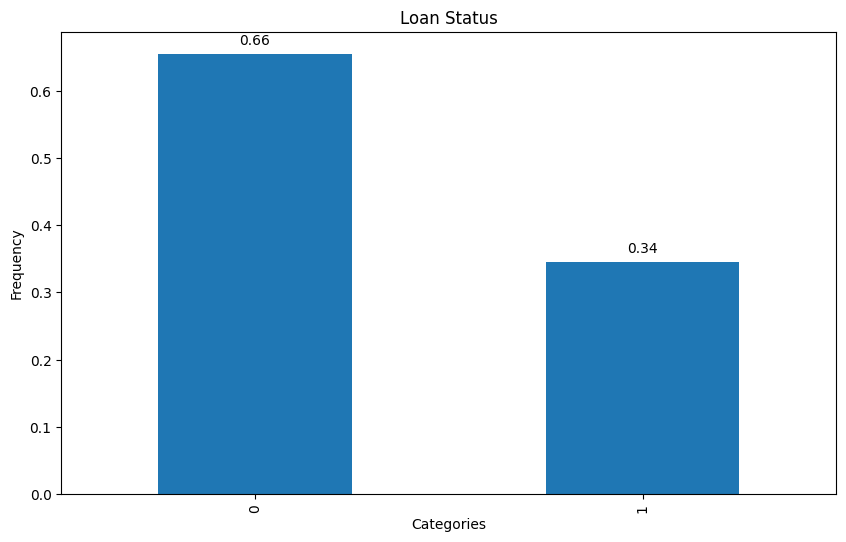

In [58]:
#Dependent Variable
plt.figure(figsize=(10, 6))
count = raw_data_copy['loan_status'].value_counts(normalize = True)
chart = count.plot.bar(title = 'Loan Status', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 0.66 or 66% of the people were approved for a loan (i.e Loan_Status = Yes)
- 0.34 or 34% of the people were not approved for a loan (i.e Loan_Status = No)

### *Independent Attributes (Ordinal):*
Ordinal data have a clear ordering or hierarchy in the categories. For example, customer satisfaction ratings can include: unsatisfied, neutral, or satisfied.

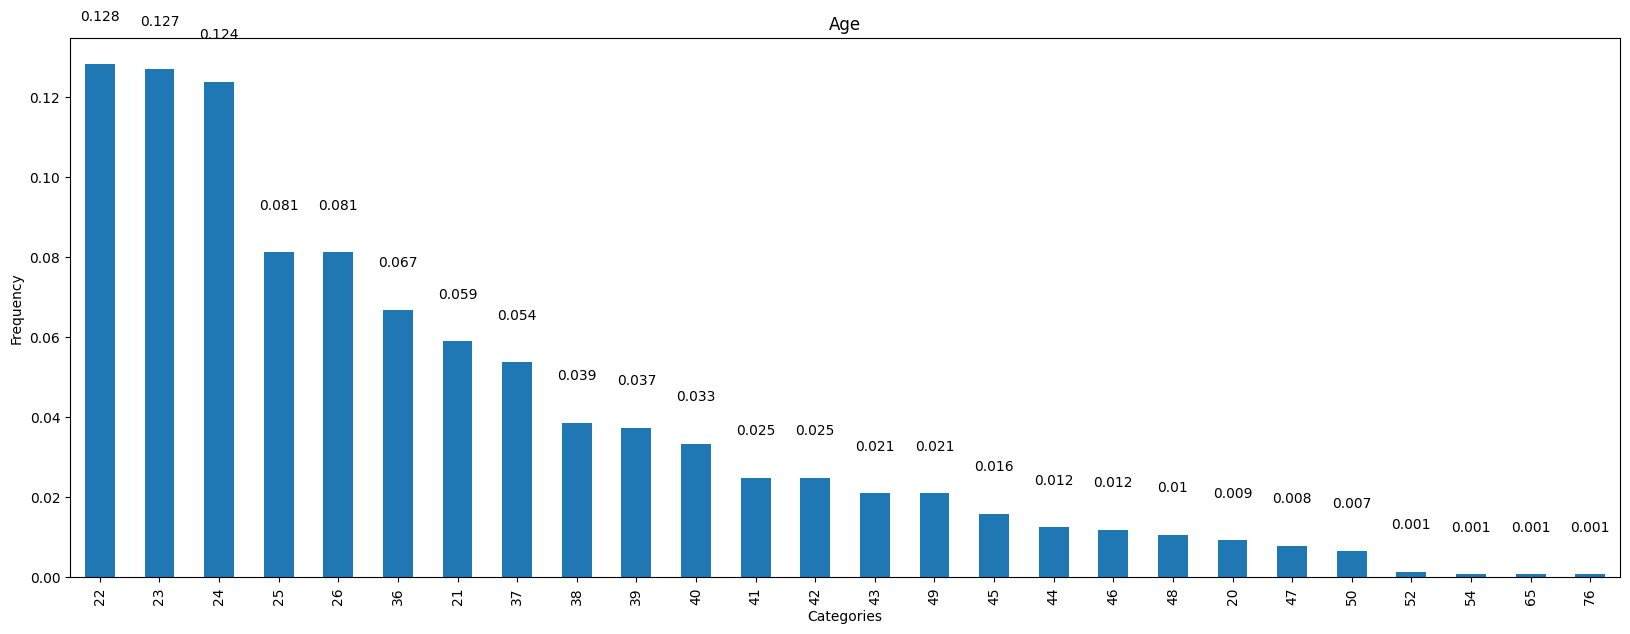

In [59]:
#person_age
plt.figure(figsize=(20, 7))
count = raw_data_copy['person_age'].value_counts('normalize = True')
chart = count.plot.bar(title='Age', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- The age group ranges from early 20s to 50s
- With the largest number of people being of age 22 to 24
- There are outlier ages that need to be addressed in the processing stage.

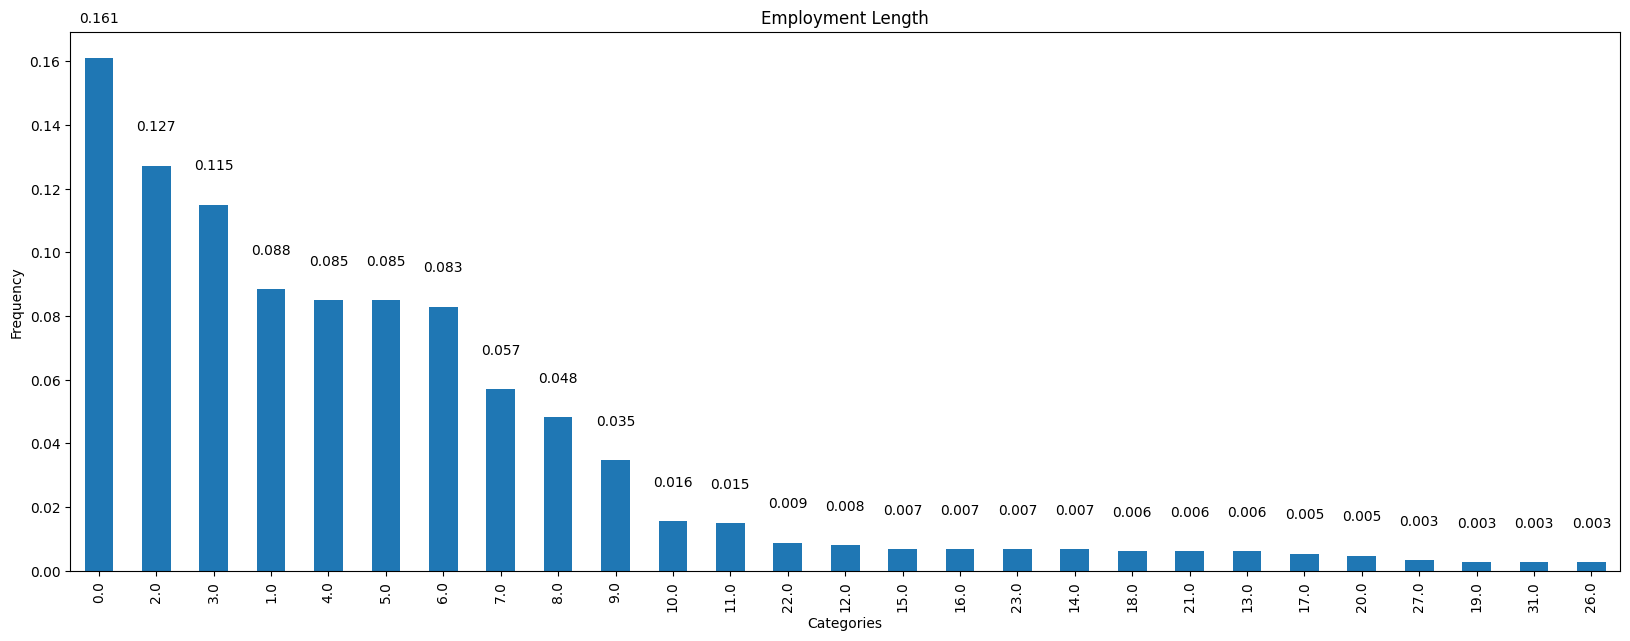

In [60]:
#person_emp_length
plt.figure(figsize=(20, 7))
count =raw_data_copy['person_emp_length'].value_counts('normalize = True')
chart = count.plot.bar(title='Employment Length', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- The most common employment length is less than a year, suggesting a high turnover rate or many short-term positions.
- There is a noticeable trend of decreasing frequency as employment length increases, showing that longer tenures are less common.
- Overall, the graph sheds light on the dynamics of the workforce, particularly in terms of employment longevity and the distribution of tenure lengths.

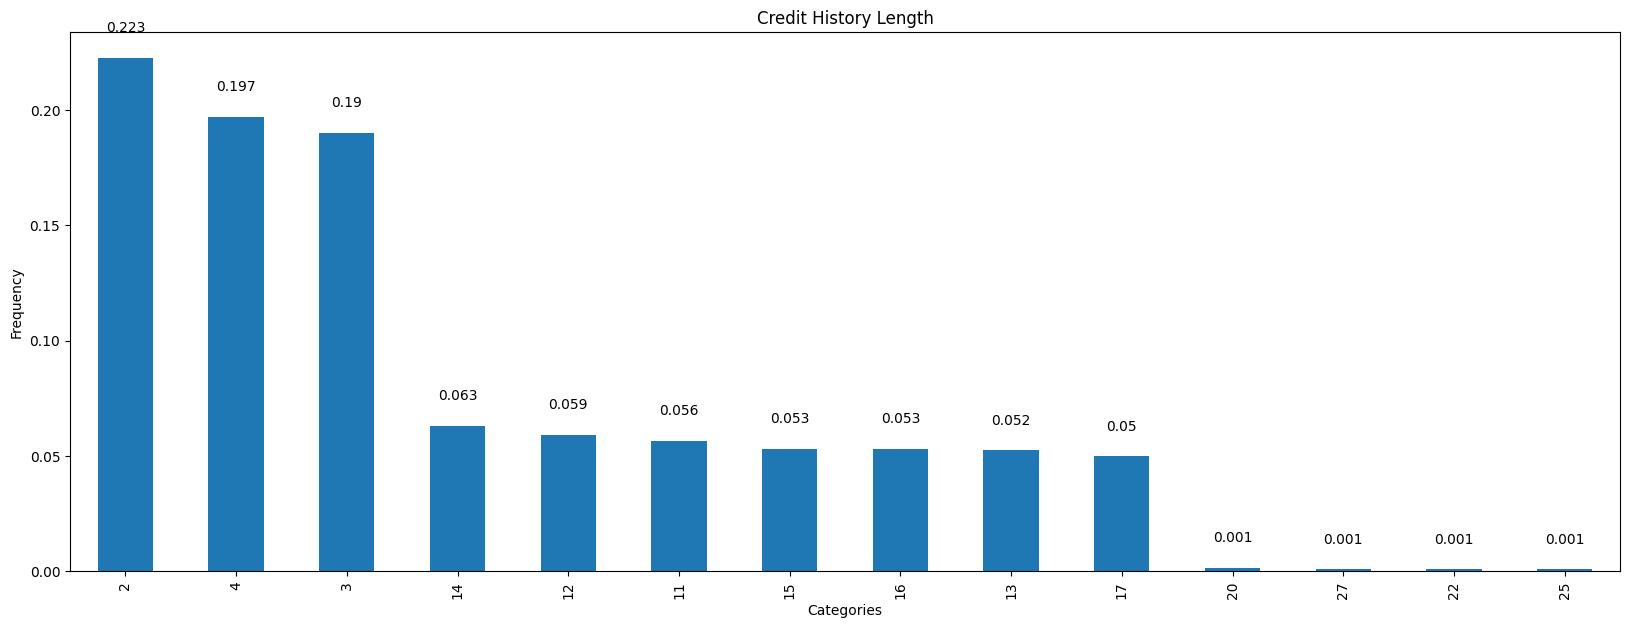

In [61]:
#cb_person_cred_hist_length
plt.figure(figsize=(20, 7))
count =raw_data_copy['cb_person_cred_hist_length'].value_counts('normalize = True')
chart = count.plot.bar(title='Credit History Length', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- The distribution appears to be right-skewed, meaning there are more individuals with shorter credit histories than those with longer ones.

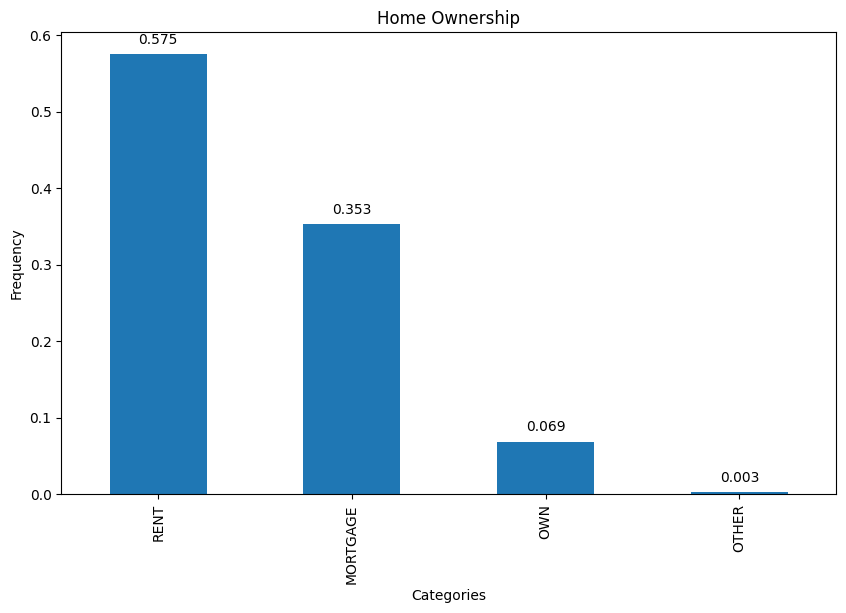

In [62]:
#person_home_ownership
plt.figure(figsize=(10, 6))
count =raw_data_copy['person_home_ownership'].value_counts('normalize = True')
chart = count.plot.bar(title='Home Ownership', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 57.5% of the people who apply for a loan pay rent
- 35.3% of the people who apply for a loan pay a mortgage
- 6.9% of the people who apply for a loan own a house
- 0.3% of the people who apply for a loan have other living arrangements

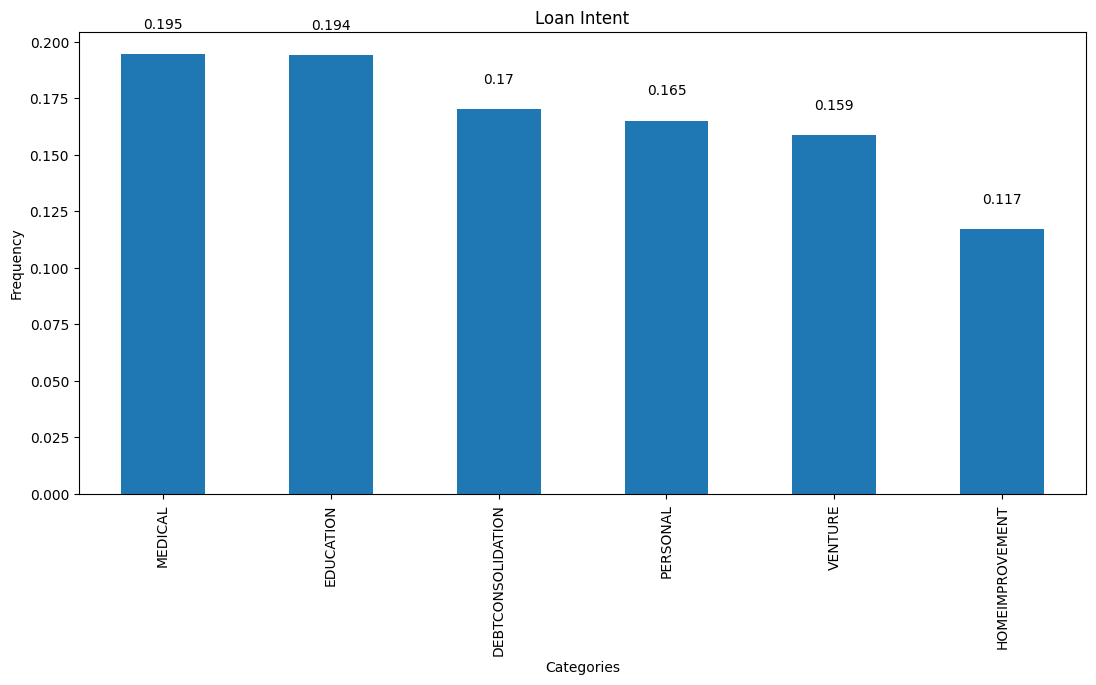

In [63]:
#loan_intent
plt.figure(figsize=(13, 6))
count =raw_data_copy['loan_intent'].value_counts('normalize = True')
chart = count.plot.bar(title='Loan Intent', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 19.6% of the people apply for a loan for their Education
- 19.4% of the people apply for a loan for their Medical bills
- 17.0% of the people apply for a loan for their Debt Consolidations
- 16.5% of the people apply for a loan for Personal reason
- 15.9% of the people apply for a loan for Venture funding
- 11.7% of the people apply for a loan for Home Improvements

### *Independent Attributes (Nominal)*
Nominal data does not have any kind of order or hierarchy but rather each category are different from each other. For example, the different breeds of dogs (Labrador, Beagle, Poodle) constitute nominal data because there is no inherent order among them.

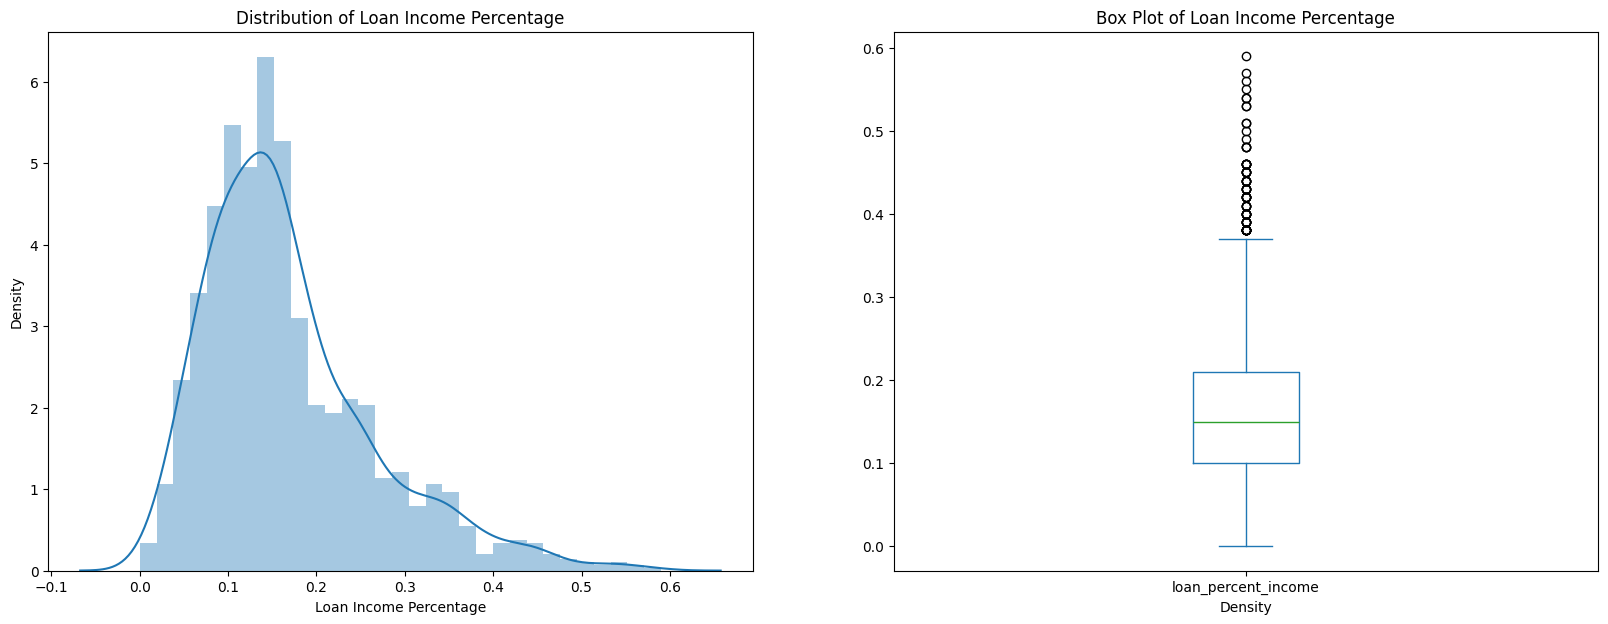

In [64]:
#loan_percent_income
plt.figure(1, figsize=(20, 7))
plt.subplot(121)
raw_data_copy.dropna()
sns.distplot(raw_data_copy['loan_percent_income'])
plt.title('Distribution of Loan Income Percentage')
plt.xlabel('Loan Income Percentage')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['loan_percent_income'].plot.box()
boxplot.set_title('Box Plot of Loan Income Percentage')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
- The distribution graph shows a right-skewed distribution, indicating most loan income percentages are low, with fewer high values.
- The box plot reveals the quartiles of the data and potential outliers above the upper whisker.

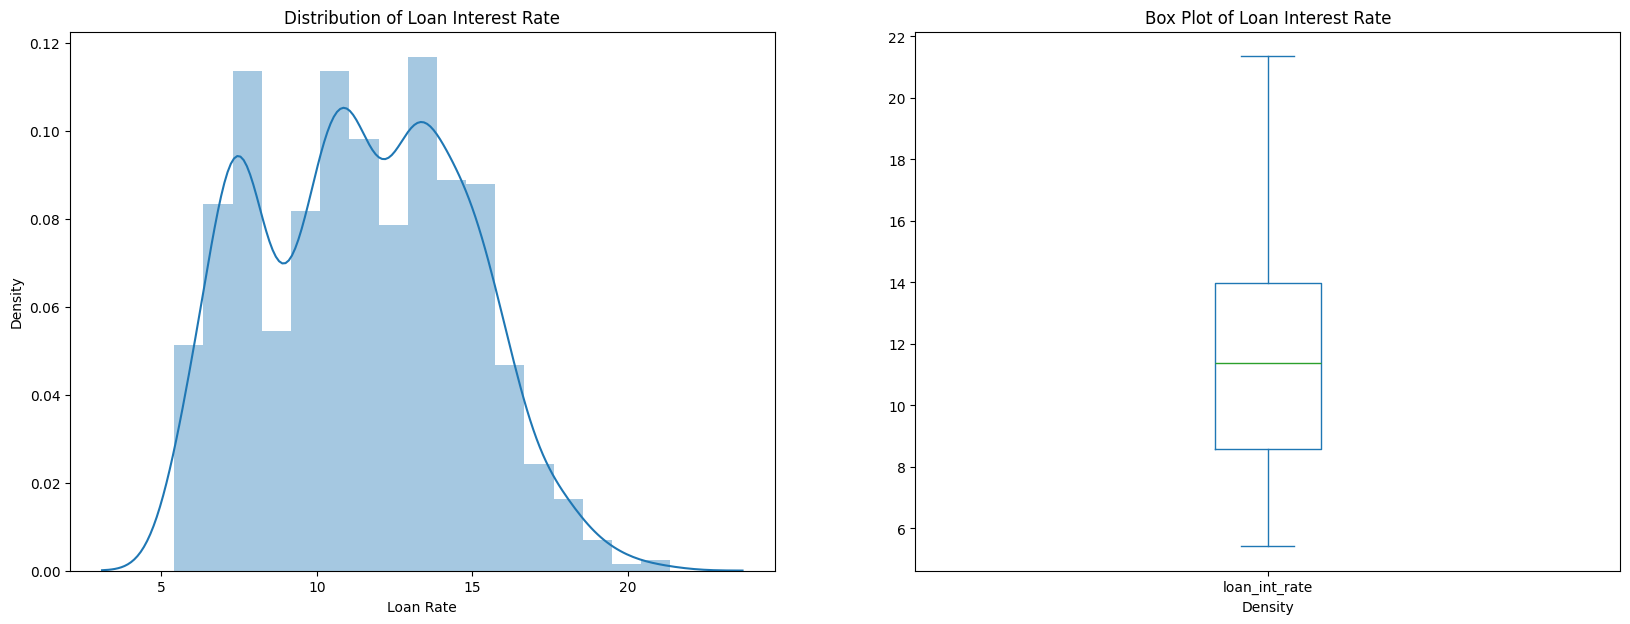

In [65]:
#loan_int_rate
plt.figure(1, figsize=(20, 7))
plt.subplot(121)
raw_data_copy.dropna()
sns.distplot(raw_data_copy['loan_int_rate'])
plt.title('Distribution of Loan Interest Rate')
plt.xlabel('Loan Rate')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['loan_int_rate'].plot.box()
boxplot.set_title('Box Plot of Loan Interest Rate')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
- The distribution graph shows a right-skewed distribution of loan rates, with the majority of values clustered between 5% and 10%.
- The box plot indicates the median rate at around 10%, with half of the rates falling between approximately 7.5% and 12.5%. 
- The box plot indicates that outliers are present above the upper whisker.

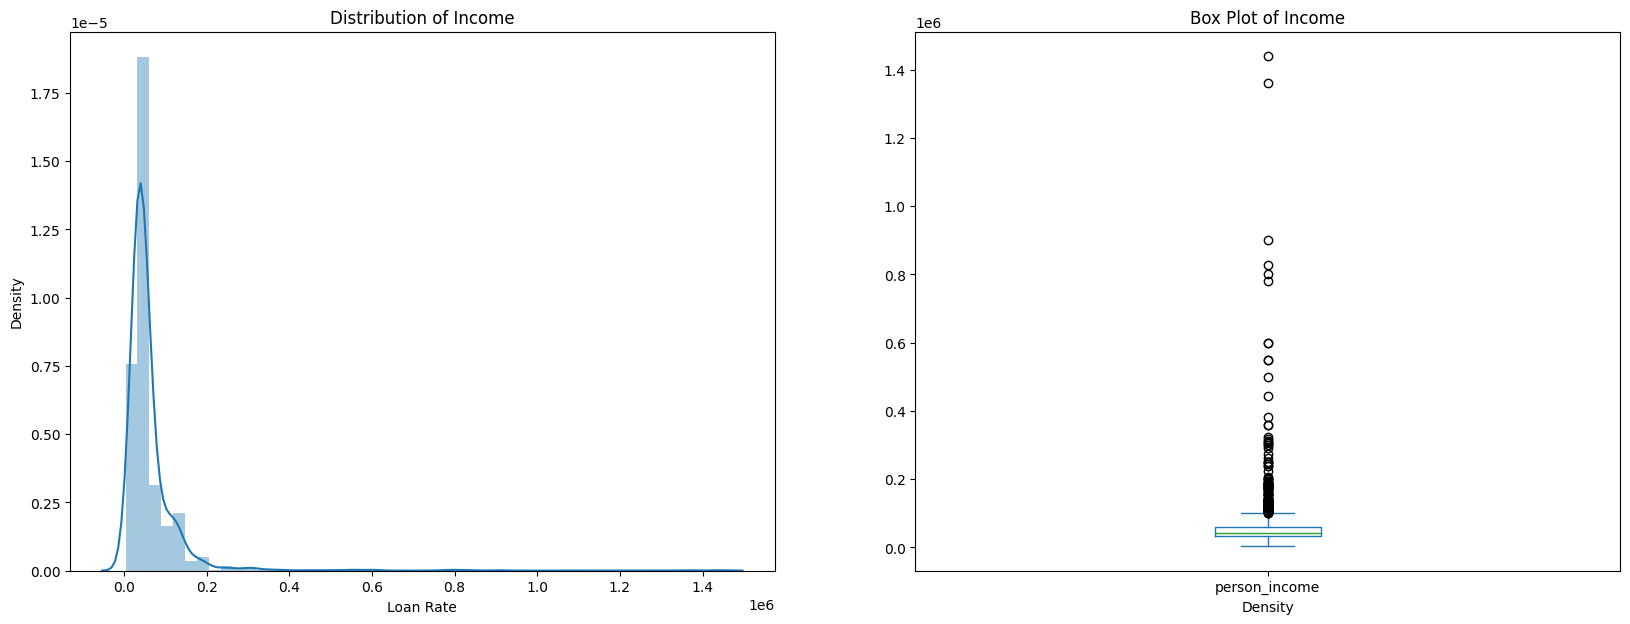

In [66]:
#person_income
plt.figure(1, figsize=(20, 7))
plt.subplot(121)
raw_data_copy.dropna()
sns.distplot(raw_data_copy['person_income'])
plt.title('Distribution of Income')
plt.xlabel('Loan Rate')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['person_income'].plot.box()
boxplot.set_title('Box Plot of Income')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
- The distribution graph indicates a peak near zero with a long tail, suggesting a large number of individuals with low income and fewer with high income, reflecting economic inequality.
- The box plot shows there are  outliers indicating individuals with significantly higher incomes.

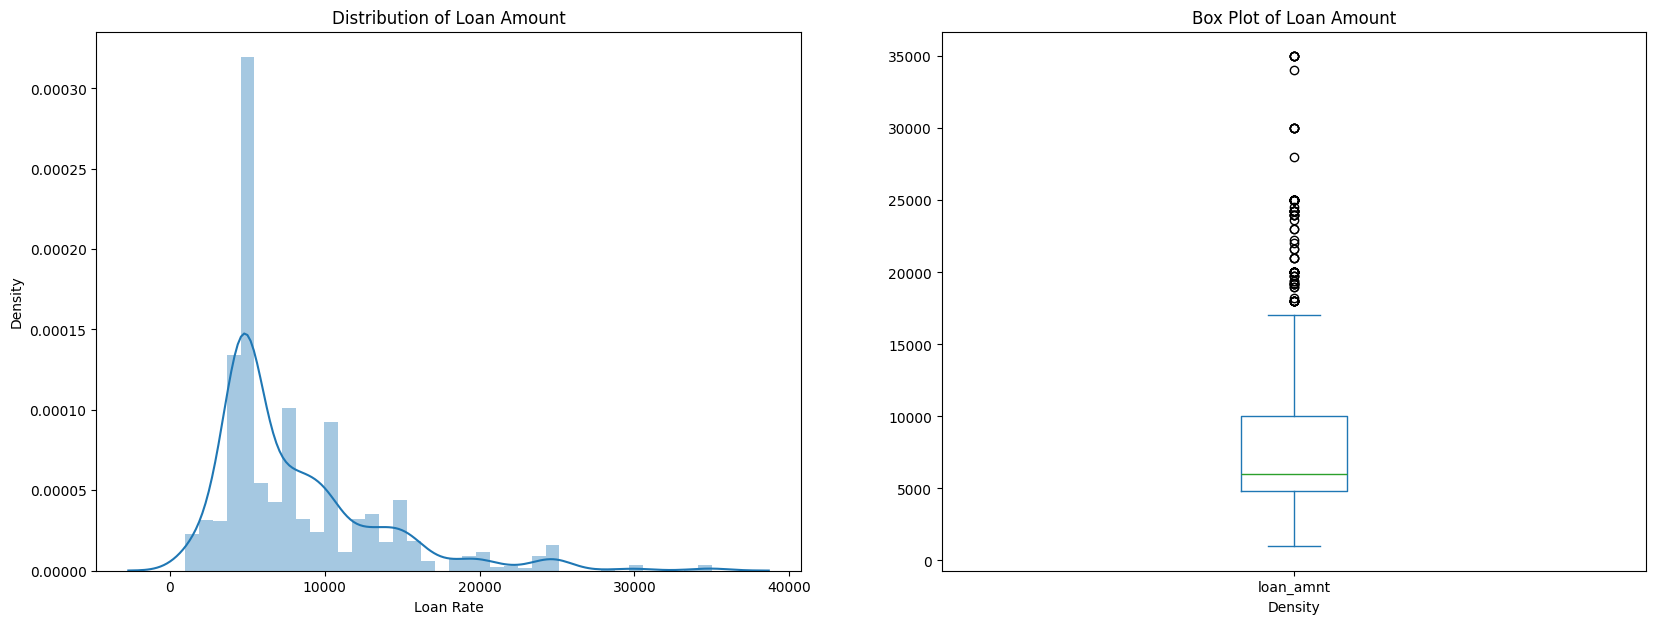

In [67]:
#loan_amnt
plt.figure(1, figsize=(20, 7))
plt.subplot(121)
raw_data_copy.dropna()
sns.distplot(raw_data_copy['loan_amnt'])
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Rate')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['loan_amnt'].plot.box()
boxplot.set_title('Box Plot of Loan Amount')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
- The distribution graph shows a right-skewed distribution with a majority of the loans being of lower amounts, indicating that smaller loans are more common.
- The box plot shows that their are outliers of loans significantly larger than the majority.

# 3. Bi-variate Analysis
- When there are two variables in the data it is called bi-variate analysis. 
- Data is analyzed to find the relationship between the dependent and independent variables.
- Analyzing bi-variate data involves the following techniques:
    - Scatter plots and stacked bar graphs
    - Correlation Coefficients
    - Covariance matrices
- The graphs created below will display how the Dependent Attribute ‘loan_status’ is distributed within each Independent Attribute, regardless of how many observations there are.

__Ordinal Independent Variables and Dependent Variable__

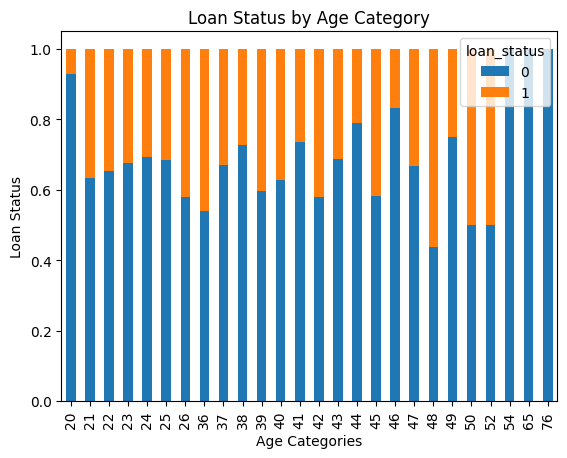

In [68]:
# Loan_Status vs person_age
person_age = pd.crosstab(raw_data_copy['person_age'], raw_data_copy['loan_status'])
person_age.div(person_age.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Age Category')
plt.xlabel('Age Categories')
plt.ylabel('Loan Status')
plt.show()

***Insight Gained:***
- Individuals with the age group of 20 have all been aproved for a loan where as individuals of age 49 have all been rejected.
- The graph suggests that age is a significant factor in loan approval decisions by lenders.

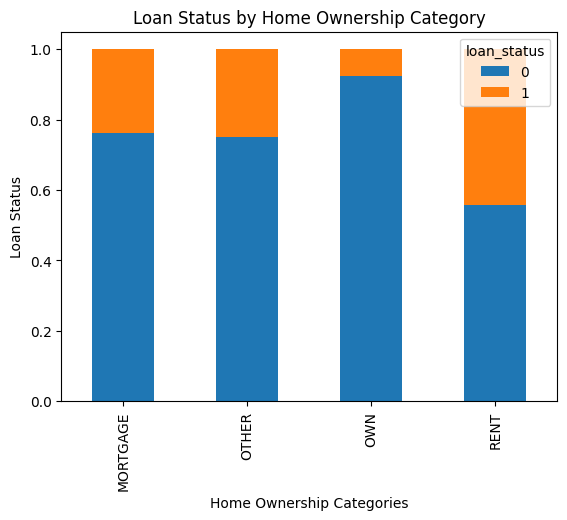

In [69]:
# Loan_Status vs person_home_ownership
person_home_ownership = pd.crosstab(raw_data_copy['person_home_ownership'], raw_data_copy['loan_status'])
person_home_ownership.div(person_home_ownership.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Home Ownership Category')
plt.xlabel('Home Ownership Categories')
plt.ylabel('Loan Status')
plt.show()

***Insights Gained:***

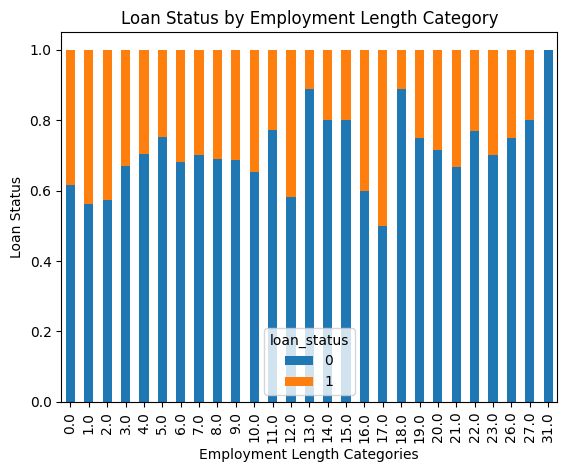

In [70]:
# Loan_Status vs person_emp_length
person_emp_length = pd.crosstab(raw_data_copy['person_emp_length'], raw_data_copy['loan_status'])
person_emp_length.div(person_emp_length.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Employment Length Category')
plt.xlabel('Employment Length Categories')
plt.ylabel('Loan Status')
plt.show()

***Insight Gained:***
- The proportions of loans that are fully paid or charged off are relatively consistent across all employment length categories.
- Employment length does not appear to be a strong indicator of loan repayment behavior, as there is no significant difference in loan status distribution among the categories.
- The graph suggests that factors other than employment length might be more influential in determining whether a loan will be fully paid or charged off.

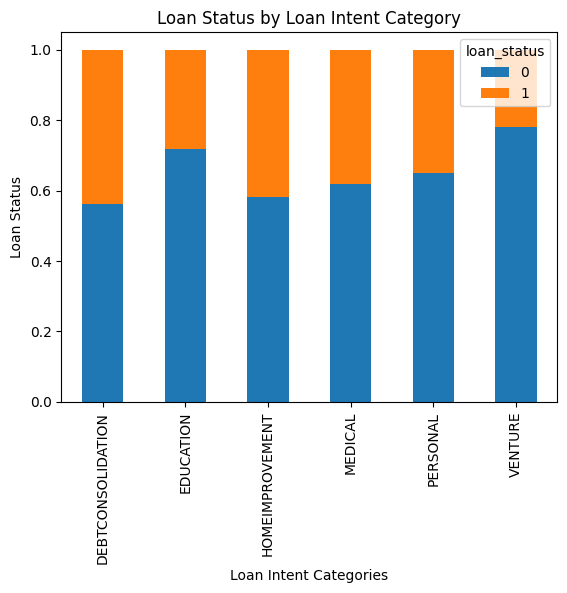

In [71]:
loan_intent = pd.crosstab(raw_data_copy['loan_intent'], raw_data_copy['loan_status'])
loan_intent.div(loan_intent.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Loan Intent Category')
plt.xlabel('Loan Intent Categories')
plt.ylabel('Loan Status')
plt.show()

***Insights Gained:***

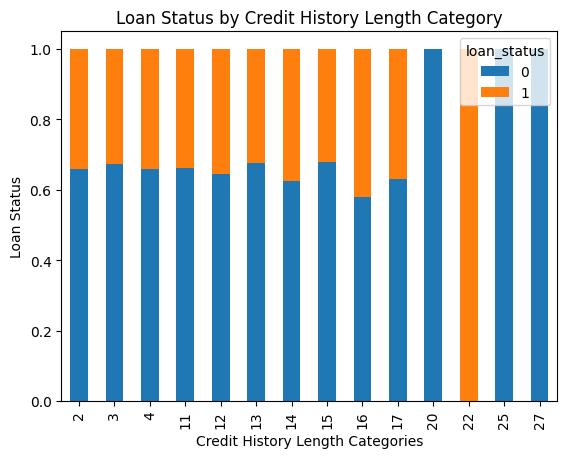

In [72]:
# Loan_Status vs cb_person_cred_hist_length
cb_person_cred_hist_length = pd.crosstab(raw_data_copy['cb_person_cred_hist_length'], raw_data_copy['loan_status'])
cb_person_cred_hist_length.div(cb_person_cred_hist_length.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Credit History Length Category')
plt.xlabel('Credit History Length Categories')
plt.ylabel('Loan Status')
plt.show()

***Insights Gained:***

__Numerical Independent Variables and Dependent Variable LoanAmount__

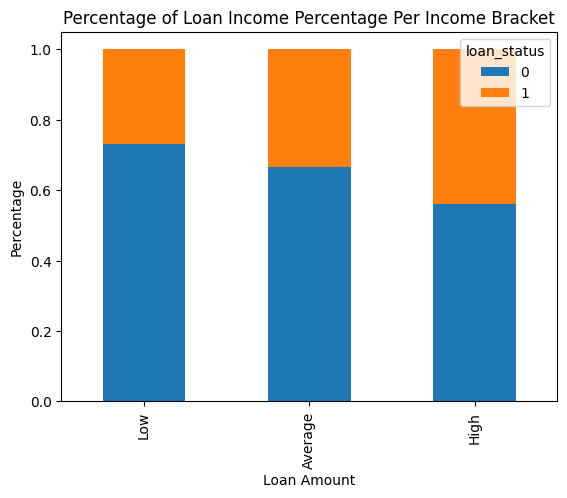

In [73]:
# Loan_Status vs loan_percent_income
low = raw_data_copy['loan_percent_income'].quantile(0.333) # 33.3th percentile
average = raw_data_copy['loan_percent_income'].quantile(0.666) # 66.6th percentile
high = 0.6

bins = [0, low, average, high]
group=['Low','Average','High']

raw_data_copy['loan_percent_income_bin']=pd.cut(raw_data_copy['loan_percent_income'],bins,labels=group)
loan_percent_income_bin=pd.crosstab(raw_data_copy['loan_percent_income_bin'],raw_data_copy['loan_status'])
loan_percent_income_bin.div(loan_percent_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Percentage of Loan Income Percentage Per Income Bracket')
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

***Insights Gained:***

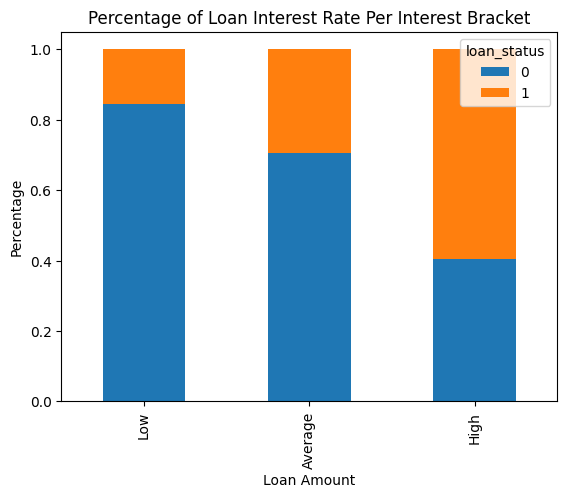

In [74]:
# Loan_Status vs loan_int_rate
low = raw_data_copy['loan_int_rate'].quantile(0.333) # 33.3th percentile
average = raw_data_copy['loan_int_rate'].quantile(0.666) # 66.6th percentile
high = 22

bins = [0, low, average, high]
group=['Low','Average','High']

raw_data_copy['loan_int_rate_bin']=pd.cut(raw_data_copy['loan_int_rate'],bins,labels=group)
loan_int_rate_bin=pd.crosstab(raw_data_copy['loan_int_rate_bin'],raw_data_copy['loan_status'])
loan_int_rate_bin.div(loan_int_rate_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Percentage of Loan Interest Rate Per Interest Bracket')
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

***Insights Gained:***

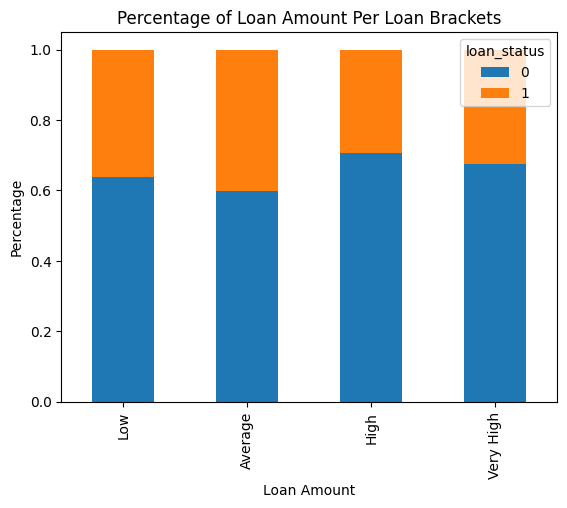

In [75]:
# Loan_Status vs loan_amnt
low = raw_data_copy['loan_amnt'].quantile(0.25) # 25th percentile
average = raw_data_copy['loan_amnt'].quantile(0.50) # 50th percentile
above_average = raw_data_copy['loan_amnt'].quantile(0.75) # 75th percentile
veryHigh = raw_data_copy['loan_amnt'].max() + 1 # maximum loan amount plus 1

bins = [0, low, average, above_average, veryHigh]
group=['Low','Average','High', 'Very High']

raw_data_copy['loan_amnt_bin'] = pd.cut(raw_data_copy['loan_amnt'], bins, labels=group)
loan_amnt_bin = pd.crosstab(raw_data_copy['loan_amnt_bin'], raw_data_copy['loan_status'])
loan_amnt_bin.div(loan_amnt_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Percentage of Loan Amount Per Loan Brackets')
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

***Insights Gained:***

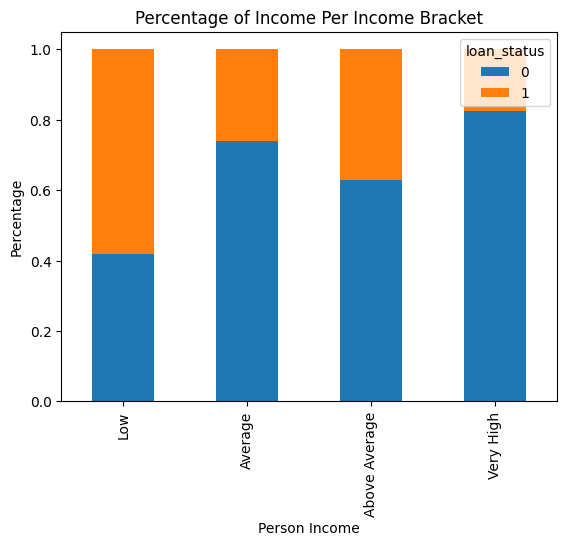

In [76]:
# Loan_Status vs person_income
low = raw_data_copy['person_income'].quantile(0.25) # 25th percentile
average = raw_data_copy['person_income'].quantile(0.50) # 50th percentile
above_average = raw_data_copy['person_income'].quantile(0.75) # 75th percentile
veryHigh = raw_data_copy['person_income'].max()+ 1 

bins = [0, low, average, above_average, veryHigh]
group=['Low','Average','Above Average', 'Very High']

raw_data_copy['person_income_bin'] = pd.cut(raw_data_copy['person_income'], bins, labels=group)
person_income_bin = pd.crosstab(raw_data_copy['person_income_bin'], raw_data_copy['loan_status'])
person_income_bin.div(person_income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Percentage of Income Per Income Bracket')
plt.xlabel('Person Income')
plt.ylabel('Percentage')
plt.show()

Drop all bins created

In [77]:
raw_data_copy=raw_data_copy.drop(['loan_percent_income_bin', 'loan_int_rate_bin', 'loan_amnt_bin', 'person_income_bin'],axis=1)

Using a Heatmap, the numerical attributes in the dataset is viewed to gain insight into the overall comparison through the colour shade variations

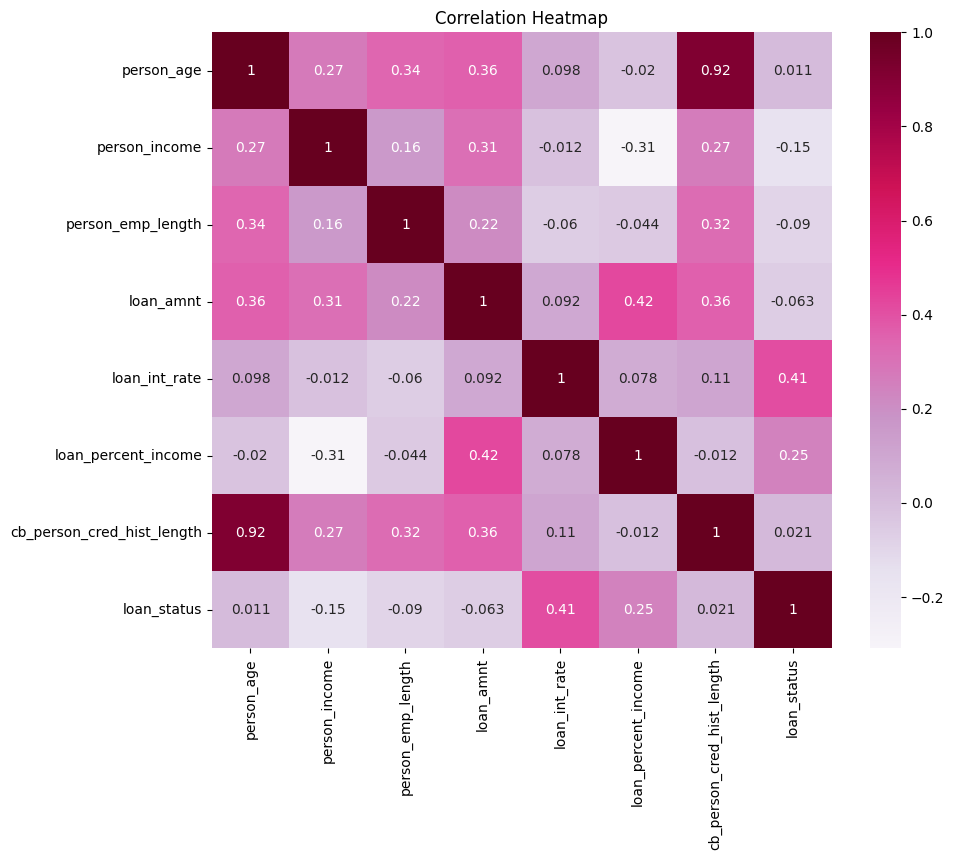

In [78]:
numeric_cols = raw_data_copy.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='PuRd')
plt.title('Correlation Heatmap')
plt.show()

***Insight Gained:***
- ‘person_age’ and ‘person_income’ have a dark red cell at their intersection, it means they are strongly positively correlated. As one increases, the other also tends to increase.
- ‘person_age’ and ‘loan_intent’ have a dark purple cell at their intersection, it means they are strongly negatively correlated. As one increases, the other tends to decrease.
- ‘person_weight’ and ‘person_income’, ‘loan_amount’ and ‘person_home_ownership’, ‘loan_intent’ and ‘loan_percent_income’ all have weak or no correlations

Having now seen how the different attributes impact the outcome in our datasets, several hypotheses can be drawn from the results.

===================================================================================
# **2. Hypotheses**

- __Hypothesis 1__: Younger individuals are more likely to get their loans approved than older individuals
    - Justification: There are a larger amount of people who are in the age range of 22 to 24 years old, and have a loan approval rate of 66%.

- __Hypothesis 2__: The attribute employment length does not significantly influence loan repayment behavior.
    - Justification: There is no significant difference in the loan status distribution among the employment length categories.

- __Hypothesis 3__: Individuals who own their homes or have a mortgage are more likely to have their loans approved.
    - Justification: Individuals who own their homes (OWN category) or have a mortgage (MORTGAGE category) have a significantly higher rate of loan approval compared to those in other categories.

- __Hypothesis 4__: Loans intended for debt consolidation, education, and home improvement have a higher approval rate compared to loans intended for medical and personal reasons
    - Justification: The likelihood of a loan being approved is higher than it being rejected, regardless of the loan intent category.

- __Hypothesis 5__: Having a credit history is beneficial for loan approval, the length of the credit history might not significantly impact the approval rate.
    - Justification: The likelihood of a loan being approved is higher than it being rejected, regardless of the length of the credit history. However, longer credit histories might lead to a slightly higher rejection rate due to the potential inclusion of more negative events.

===================================================================================

# **3. Data Cleaning**

The first step in any model builiding is making sure we have accurate data that will not parse errors in the build of this model. This is where data cleaning comes in.

Read in both CSV files

In [79]:
credit_risk_raw_data = pd.read_csv('credit_risk_raw_data.csv')
credit_risk_raw_data_copy = credit_risk_raw_data.copy()

credit_risk_validation_data = pd.read_csv('validation_data.csv')
credit_risk_validation_data_copy = credit_risk_validation_data.copy()

__1. Attribute Name Standardization Process for both dataset__

Create a dictionary to map the old column names to the new ones to format the column names:

In [80]:
raw_data_column_name_mapping = {
    'cb_person_cred_hist_length': 'person_cred_hist_length'
}

validation_data_column_name_mapping = {
    'cb_person_cred_hist_length': 'person_cred_hist_length'
}

Replace the original column names with the formatted names: 

In [81]:
credit_risk_raw_data_copy.rename(columns=raw_data_column_name_mapping, inplace=True)
credit_risk_validation_data_copy.rename(columns=validation_data_column_name_mapping, inplace=True)

## A. Handling missing values

For both dataset, check for missing values

In [82]:
print(f"Number of Missing Values in credit_risk_raw_data_copy:\n{credit_risk_raw_data_copy.isnull().sum()}\n")
print(f"Number of Missing Values in credit_risk_validation_data_copy:\n{credit_risk_validation_data_copy.isnull().sum()}\n")

Number of Missing Values in credit_risk_raw_data_copy:
person_age                   0
person_income                0
person_home_ownership        0
person_emp_length           56
loan_intent                  0
loan_amnt                    0
loan_int_rate              156
loan_percent_income          0
person_cred_hist_length      0
loan_status                  0
dtype: int64

Number of Missing Values in credit_risk_validation_data_copy:
person_age                 0
person_income              0
person_home_ownership      0
person_emp_length          0
loan_intent                0
loan_amnt                  0
loan_int_rate              0
loan_percent_income        0
person_cred_hist_length    0
dtype: int64



***Based on the missing value check above, it was noted that there are missing values in the following attributes for the credit_risk_raw_data_copy dataset:***
- person_emp_length
- loan_int_rate

***In order to fill in the missing values the attributes need to be split into Ordinal and Numerical Variables. For Ordinal Variables use the mode of all the values in the attribute to fill in the missing data values:***
- person_emp_length (0 - 23, 27 or 31)

***For Numerical Variables use either the mean or median of the values in the attribute to fill in the missing data values***
- loan_int_rate

__ORDINAL VARIABLES__

In [83]:
credit_risk_raw_data_copy['person_emp_length'].fillna(credit_risk_raw_data_copy['person_emp_length'].mode()[0],inplace=True)

__NUMERICAL VARIABLES__

Median is used instead of mean due to the outliers in the attributes data which could negatively impact the outcome

In [84]:
credit_risk_raw_data_copy['loan_int_rate'].fillna(credit_risk_raw_data_copy['loan_int_rate'].median(),inplace=True)

Check the file to see whether the missing values have been added

In [85]:
print(f"Number of Missing Values in credit_risk_raw_data_copy:\n{credit_risk_raw_data_copy.isnull().sum()}\n")

Number of Missing Values in credit_risk_raw_data_copy:
person_age                 0
person_income              0
person_home_ownership      0
person_emp_length          0
loan_intent                0
loan_amnt                  0
loan_int_rate              0
loan_percent_income        0
person_cred_hist_length    0
loan_status                0
dtype: int64



## B. Removing duplicates

For both dataset, check for duplicate records and remove them from the dataset

In [86]:
print(f"Number of duplicate rows in raw_data_copy: {credit_risk_raw_data_copy.duplicated().sum()}")
print(f"Number of duplicate rows in validation_data_copy: {credit_risk_validation_data_copy.duplicated().sum()}\n")

Number of duplicate rows in raw_data_copy: 1
Number of duplicate rows in validation_data_copy: 0



There is a duplicate record in the credit_risk_raw_data_copy dataset, as a result it will need to be dropped.

In [87]:
credit_risk_raw_data_copy = credit_risk_raw_data_copy.drop_duplicates()

Check that the duplicate record was removed

In [88]:
print(f"Number of duplicate rows in raw_data_copy: {credit_risk_raw_data_copy.duplicated().sum()}\n")

Number of duplicate rows in raw_data_copy: 0



Convert the datatype of the attribute 'person_emp_length' in credit_risk_validation_data_copy to float64

In [89]:
credit_risk_validation_data_copy['person_emp_length'] = credit_risk_validation_data_copy['person_emp_length'].astype('float64')
print(f"person_emp_length datatype: {credit_risk_validation_data_copy['person_emp_length'].dtypes}\n")

person_emp_length datatype: float64



## C. Outlier value Handling

__For both dataset, perform outliers Data Handling using log transformation__

In [90]:
# For the 'credit_risk_validation_data_copy' dataset
credit_risk_validation_data_copy = credit_risk_validation_data_copy[credit_risk_validation_data_copy['person_income'] < 1000000]
credit_risk_raw_data_copy = credit_risk_raw_data_copy[credit_risk_raw_data_copy['person_income'] < 1000000]

In [91]:
print(f"credit_risk_raw_data_copy person_emp_length datatype:\n{credit_risk_raw_data_copy['person_income'].describe()}\n")
print(f"credit_risk_validation_data_copy person_emp_length datatype:\n{credit_risk_validation_data_copy['person_income'].describe()}\n")

credit_risk_raw_data_copy person_emp_length datatype:
count      1523.000000
mean      60931.252791
std       66339.170965
min        4000.000000
25%       34000.000000
50%       42000.000000
75%       60758.000000
max      900000.000000
Name: person_income, dtype: float64

credit_risk_validation_data_copy person_emp_length datatype:
count       469.000000
mean      68590.279318
std       69577.787894
min        9600.000000
25%       34000.000000
50%       55000.000000
75%       77052.000000
max      762000.000000
Name: person_income, dtype: float64



__For both datasets, write the new datasets to CSV files__

In [92]:
credit_risk_raw_data_copy.to_csv('cleaned_credit_risk_raw_data.csv', index=False)
credit_risk_validation_data_copy.to_csv('cleaned_credit_risk_validation_data.csv', index=False)

===================================================================================

Now that we have our training and test data, we can move onto building the initial model.

# **5. MODEL 1**
## A. Split Dataset
The use of dummy data is a common practice to transform categorical data into a binary format. This transformation assists with  easier quantification and comparisons in future models. 

When it comes to splitting the data into training and testing sets, a typical weightage of **80% (0.8)** is assigned to the *training* dataset, while the remaining **20% (0.2)** is allocated to the *testing* dataset. Additionally, to ensure the consistency of the train/test split across multiple executions of the code, **‘random_state=42’** is used. This guarantees that the same train/test split is reproduced every time the code is run, thereby ensuring reproducibility.


In [93]:
# Read Cleaned CSV Files
cleaned_raw_data = pd.read_csv('cleaned_credit_risk_raw_data.csv')
cleaned_raw_data_copy = cleaned_raw_data.copy()

# Define the independent variables (features) and the target variable
X = cleaned_raw_data_copy.drop('loan_status', axis=1)
y = cleaned_raw_data_copy['loan_status']

# Convert categorical variable in the X dataset(all columns except 'loan_status') into dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create new DataFrames for training and testing sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save the training and testing sets to CSV files
train_data.to_csv('train_data_ML1.csv', index=False)
test_data.to_csv('test_data_ML1.csv', index=False)

## B. Build the Model
A Logistics Regression model is chosen for the first model to be built. It will be trained to make predictions, the accuracy of the predictions will be determined and stored in a csv file.

__Calculate the accuracy score for the predictions of the model__

In [94]:
# 1. Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 2. Make predictions with the model
y_pred = logreg.predict(X_test)

# 3. Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# 4. Save the predictions to a csv file
predictions = pd.DataFrame(y_pred, columns=['predictions'])
predictions.to_csv('logreg_predictions.csv', index=False)

Model Accuracy: 0.7344262295081967


### ***Cross Validation***
A cross validation model will be built using a different data split to validate the accuracy of the predictions made. A new split will result in a more accurate Logistics Regression model. Predictions are made on the new model and the accuracy is calculated and compared to determine which model has the best accuracy.

In [95]:
# For this, we'll use a new split of the data
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size=0.2, random_state=0)
logreg_cv = LogisticRegression()
logreg_cv.fit(X_train_cv, y_train_cv)

# 6. Make predictions on the cross validate model
y_pred_cv = logreg_cv.predict(X_test_cv)

# 7. Check the accuracy score of the cross validate model
accuracy_cv = accuracy_score(y_test_cv, y_pred_cv)
print(f"Cross-Validated Model Accuracy: {accuracy_cv}")

# 8. Save the cross validate predictions to csv file
predictions_cv = pd.DataFrame(y_pred_cv, columns=['predictions_cv'])
predictions_cv.to_csv('logreg_predictions_cv.csv', index=False)

# 9. Determine which model is the most accurate
if accuracy > accuracy_cv:
    most_accurate_model = logreg
    print("The original model is the most accurate.")
else:
    most_accurate_model = logreg_cv
    print("The cross-validated model is the most accurate.")

Cross-Validated Model Accuracy: 0.7377049180327869
The cross-validated model is the most accurate.


As the split for the cross validate model is not set the results might vary, however, in this instance the best model see is the cross-validated model with an accuracy of 73.77%. This model is then taken an hyperparameter tuning is conducted to try an build a more accurate model.

### ***Hyperparameter Tuning***
The tuning is conducted using a technique called Grid Search. In this method, a grid of hyperparameters is defined in the param_grid dictionary. For the hyperparameter ***‘C’***, which controls the inverse of regularization strength, a logarithmic space of values ranging from ***10^−3 to 10^3*** is explored. The ***‘penalty’*** hyperparameter is set to **‘l2’**, indicating the use of L2 or Ridge regularization. Lastly, the ***‘solver’*** hyperparameter is set to explore three different types of optimization algorithms: ***‘newton-cg’***, ***‘lbfgs’***, and ***‘liblinear’***. 

The Grid Search method will then train the model on the different combinations of these hyperparameters and identify the combination that produces the best model performance.

In [96]:
# Define the parameter grid
param_grid = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(most_accurate_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best score
best_score = grid_search.best_score_
print(f"Best score: {best_score}")

Best parameters: {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.7717870876340822


The best parameters ***'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'*** resulted in an accuracy score of 77.18%. Compared to the untuned model with an accuracy of 73.77%, it can be seen that the tuning was a success.

#### *Retrain and Rebuild the model*
The cross validated model is then updated with the best parameters and retrained to get new predictions and the accuracy of those predictions.

In [97]:
# Update the most accurate model with the best parameters and retrain
most_accurate_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])
most_accurate_model.fit(X_train, y_train)

# Make predictions with the retrained model
y_pred_updated = most_accurate_model.predict(X_test)

# Check the accuracy of the retrained model
accuracy_updated = accuracy_score(y_test, y_pred_updated)
print(f"Updated Model Accuracy: {accuracy_updated}")

# Save the updated predictions to a csv file
predictions_updated = pd.DataFrame(y_pred_updated, columns=['predictions_updated'])
predictions_updated.to_csv('logreg_predictions_updated.csv', index=False)

# Determine which model is the most accurate
if accuracy_updated > accuracy and accuracy_updated > accuracy_cv:
    print("The updated model is the most accurate.")
elif accuracy > accuracy_cv:
    print("The original model is the most accurate.")
else:
    print("The cross-validated model is the most accurate.")

Updated Model Accuracy: 0.7278688524590164
The cross-validated model is the most accurate.


The original model, the cross validate model and the newly trained model with the updated parameters are compared to determine which model has the most accurate predictions. This model is still the cross validate model.

### ***Feature Importance***
Using the cross validate model, feature importance is calculated to gain insight into the feature that has the highest weight in the determining of the 'loan_status' outcome.

In [98]:
# 12. Create feature importance values for the most accurate model
feature_importance_updated = pd.DataFrame({'feature': X.columns, 'importance': most_accurate_model.coef_[0]})
feature_importance_updated = feature_importance_updated.sort_values('importance', ascending=False)

# 13. Save the updated feature importance values to a csv file
feature_importance_updated.to_csv('most_accurate_model_feature_importance_updated.csv', index=False)

### ***Pickle File***
Lastly the best model is stored in a pickle file for later retrieval.

In [99]:
# 14. Save the model that is the most accurate to a pickle file named 'Model_1.pkl'
with open('Model_1.pkl', 'wb') as file:
    pickle.dump(most_accurate_model, file)

===================================================================================

# **6. Feature Engineering**
Feature engineering involves creating new input features from the existing ones in the dataset. This process enhances the predictive power of the learning algorithm by creating features that help to uncover complex patterns in the data. It can involve a range of activities such as extracting more information from existing data, combining features to create new ones, or transforming features to a form more suitable for the model. 

Feature engineering can significantly improve model accuracy because it allows the model to visualise the data from different perspectives and thus capture more patterns or reduce noise. In the case of our dataset new features were created by combining existing features in various ways.

### Feature 1: Income to Age Ratio
The creation of this feature could provide additional insight into the financial maturity of the borrowers. A higher ratio might indicate that the borrower has a high income relative to their age, which could potentially lead to a lower risk of default.

In [100]:
# Feature 1: Income to Age Ratio
cleaned_raw_data_copy['income_to_age_ratio'] = cleaned_raw_data_copy['person_income'] / cleaned_raw_data_copy['person_age']

### Feature 2: Loan Amount to Income Ratio 
Creating this feature could provide insight into the borrower’s ability to repay the loan. A lower ratio might indicate that the borrower has sufficient income to repay the loan, which could potentially lead to a lower risk of default.

In [101]:
# Feature 2: Loan Amount to Income Ratio
cleaned_raw_data_copy['loan_amt_to_income_ratio'] = cleaned_raw_data_copy['loan_amnt'] / cleaned_raw_data_copy['person_income']

### Feature 3: Employment Length to Age Ratio
This feature could provide insight into the stability of the borrower’s income. A higher ratio might indicate that the borrower has had a stable source of income for a significant portion of their life, which could potentially lead to a lower risk of default.

In [102]:
# Feature 3: Employment Length to Age Ratio 
cleaned_raw_data_copy['emp_length_to_age_ratio'] = cleaned_raw_data_copy['person_emp_length'] / cleaned_raw_data_copy['person_age']

The new features are visualised on distribution graphs to see their distribution across the various data categories. Following this the features used to create the new features are dropped to reduce the high correlation between them as well as to reduce the noise in the dataset for a more accurate result. Lastly the new data is stored in a csv file to be retrieved by the 2nd model.

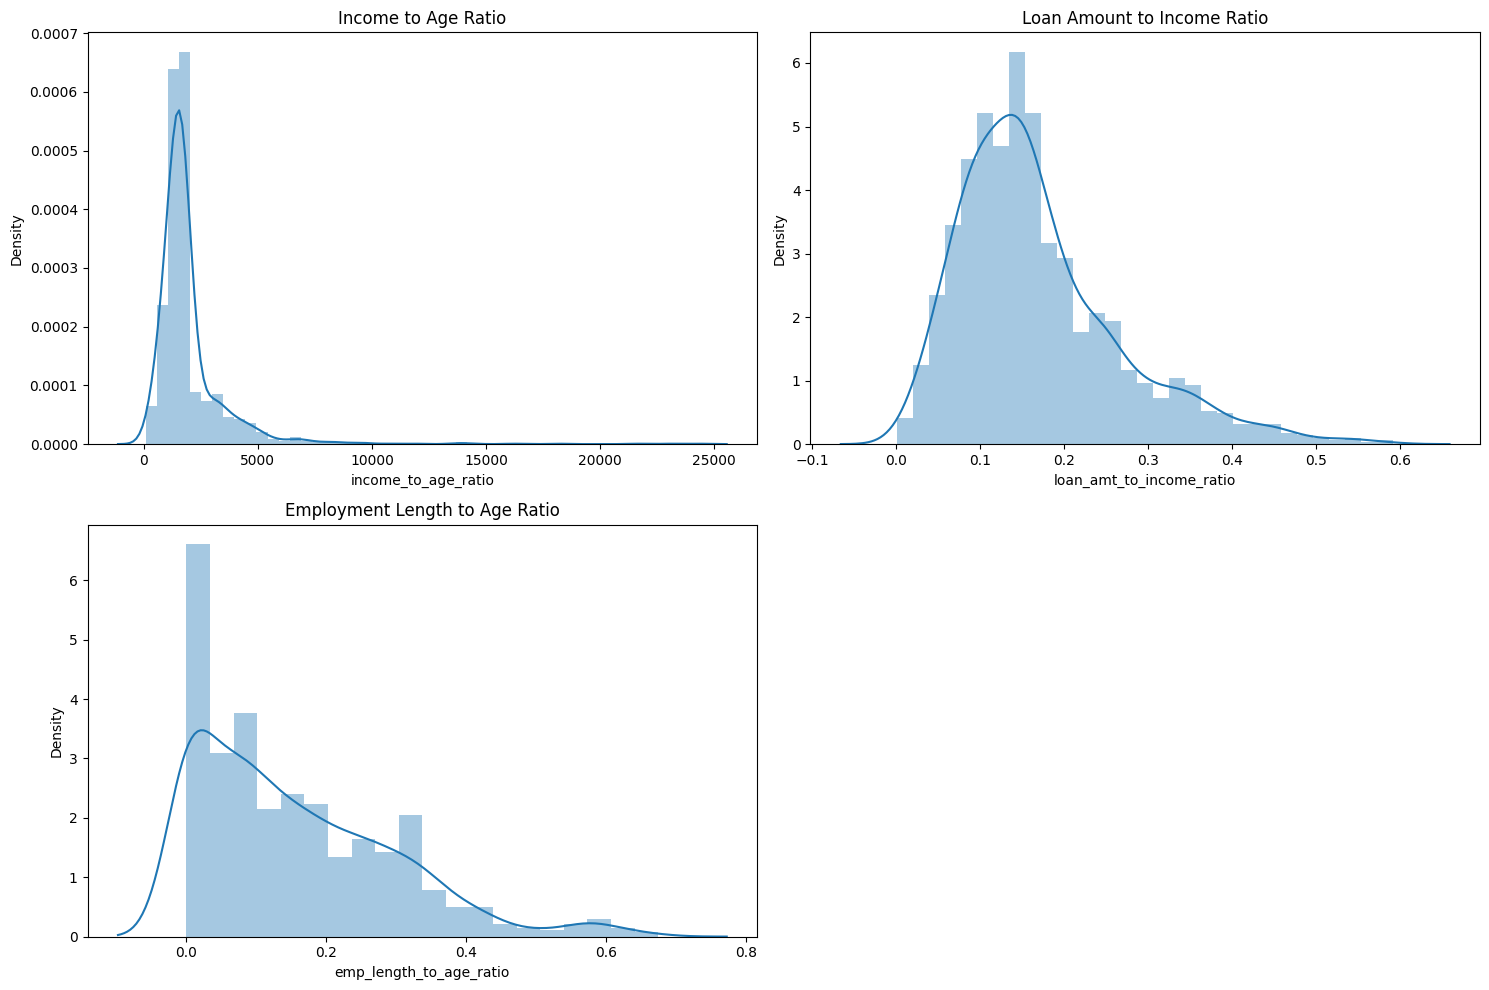

In [103]:
# Plotting the distribution of the new features
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.distplot(cleaned_raw_data_copy['income_to_age_ratio'])
plt.title('Income to Age Ratio')

plt.subplot(2, 2, 2)
sns.distplot(cleaned_raw_data_copy['loan_amt_to_income_ratio'])
plt.title('Loan Amount to Income Ratio')

plt.subplot(2, 2, 3)
sns.distplot(cleaned_raw_data_copy['emp_length_to_age_ratio'])
plt.title('Employment Length to Age Ratio')

plt.tight_layout()
plt.show()


## Remove all features that created the new features
    # The correlation between those old feature and the new features are very high.
    # Logistic regression assume that the variables are not highly correlated.
    # Due to this the excess noise in the datasets are removed.

cleaned_raw_data_copy = cleaned_raw_data_copy.drop(['person_income', 'person_age', 'loan_amnt', 'person_emp_length'], axis=1)

# Store new Features in CSV files
cleaned_raw_data_copy.to_csv('new_features_engineered.csv', index=False)

===================================================================================

# **7. Model 2**

===================================================================================

# **8. Validate Model 2**

===================================================================================

# **9. Web Application**

In [104]:
# Load the model
with open('Model_2.pkl', 'rb') as file:
    model = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'Model_2.pkl'

In [ ]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Credit Risk Assessment Application"),
    html.Div([
        html.Label("Age:"),
        dcc.Input(id='person_age', type='number', placeholder = 'Age'),
        html.Label("Income"),
        dcc.Input(id = "person_income", type = 'number', placeholder = "Income"),
        html.Label("Home Ownership:"),
        dcc.Dropdown(id="person_home_ownership", options = [
            {'label': 'Own', 'value':'OWN'},
            {'label':'Rent','value':'RENT'},
            {'label':'Morgage','value': 'MORGAGE'},
            {'label':'Other', 'value':'OTHER'}
        ], placeholder="Select Your Home Ownership"),
        html.Label("Employment Length in years"),
        dcc.Input(id="person_emp_length",type='number',placeholder='Enter years in employment'),
        html.Label("Loan Intenet"),
        dcc.Dropdown(id='loan_intent', options = [
            {'label':'Personal','value':'Personal'},
            {'label':'Education','value':'EDUCATIONAL'},
            {'label':'Medical', 'value':'MEDICAL'},
            {'label':'Venture','value':'VENTURE'},
            {'label':'Home Improvements','value':'HOMEIMPROVEMENTS'},
            {'label':'Debt Consolidation','value':'DEBTCONSOLIDATION'}],
        placeholder = 'Select Loan Intenet'),
        html.Label("Loan Amount:"),
        dcc.Input(id = 'loan_amnt', type='number', placeholder='Loan Amount'),
        html.Label("Interest Rate:"),
        dcc.Input(id='loan_int_rate', type='number', placeholder = 'Interest Rate',step=0.01),
        html.Label("Loan Percent Income:"),
        dcc.Input(id='loan_percent_income', type='number',placeholder = 'Loan percent Income',step=0.01),
        html.Label("Credit Default on File:"),
        dcc.Dropdown(id='cb_person_default_on_file',options=
                    [
                    {'label':'Yes','value':'Y'},
                    {'label':'No','value':'N'}
                    ],placeholder = "Credit default on file?"),
        html.Label("Credit History Length in years:"),
        dcc.Input(id='cb_person_cred_hist_length',type='number',placeholder='Credit History length in years' ),
        html.Button("Submit", id = 'submit',n_clicks=0),
        ]),
        html.Div(id='prediction-output', children='Fill in the form and press Enter')    
        
    ])

In [ ]:
@app.callback(
    Output('prediction-output','children'),
    [Input('submit','n_clicks')],
    [State('person_age','value'),
    State('person_income','value'),
    State('person_home_ownership','value'),
    State('person_emp_length','value'),
    State('loan_intent','value'),
    State('loan_amnt','value'),
    State('loan_int_rate','value'),
    State('loan_percent_income','value'),
    State('cb_person_default_on_file','value'),
    State('cb_person_cred_hist_length','value')])

In [ ]:
def update_output(n_clicks, person_age, person_income, person_home_ownership, person_emp_length,
                loan_intent, loan_amnt, loan_int_rate, loan_percent_income, cb_person_default_on_file,
                cb_person_cred_hist_length):
    if n_clicks > 0:
        #prediction goes here

    
    
        return "Simulated Prediction: 0 "
    else:
        return 'Fill in the form and press Enter'
    
if __name__ == "__main__":
    app.run_server(debug=True)

In [ ]:
input_data = np.array([[person_age, person_income, person_home_ownership, person_emp_length,
                loan_intent, loan_amnt, loan_int_rate, loan_percent_income, cb_person_default_on_file,
                cb_person_cred_hist_length]])
        
        prediction = model.predict(input_data)